# Exploratory Data Analysis (EDA) Image Analysis 

## Emotion Face Classifier Notebook 3

Focuses on showing example expressions and aggregrate representations of emotion categories.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
import itertools

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [4]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [5]:
from utils.image_processing import (
    preprocess_images,
    generate_sample_images,
    plot_face_matrix,
    generate_composite_faces,
    run_dimensionality_reduction,
    generate_pixel_intensities
)

In [6]:
from utils.analysis_tools import instantiate_model

In [7]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [8]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,slategray
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,sienna


In [9]:
# Select training data
print(fer2013.shape)
train_df = fer2013[fer2013['usage']=='Training']
print(train_df.shape)

(35887, 9)
(28709, 9)


In [10]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
# print_json(common_dicts)

In [11]:
# Get subset of emo-color mappings
color_dict = common_dicts['plotly_styles']['Training']['color']
color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [12]:
emo_samples = generate_sample_images(train_df, n=5, cat_col='emotion', path_col='img_path')

In [13]:
color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [14]:
sample_imgs_save_path = os.path.join('imgs', 'comparisons', 'sample_images.png')

Plot saved to imgs/comparisons/sample_images.png


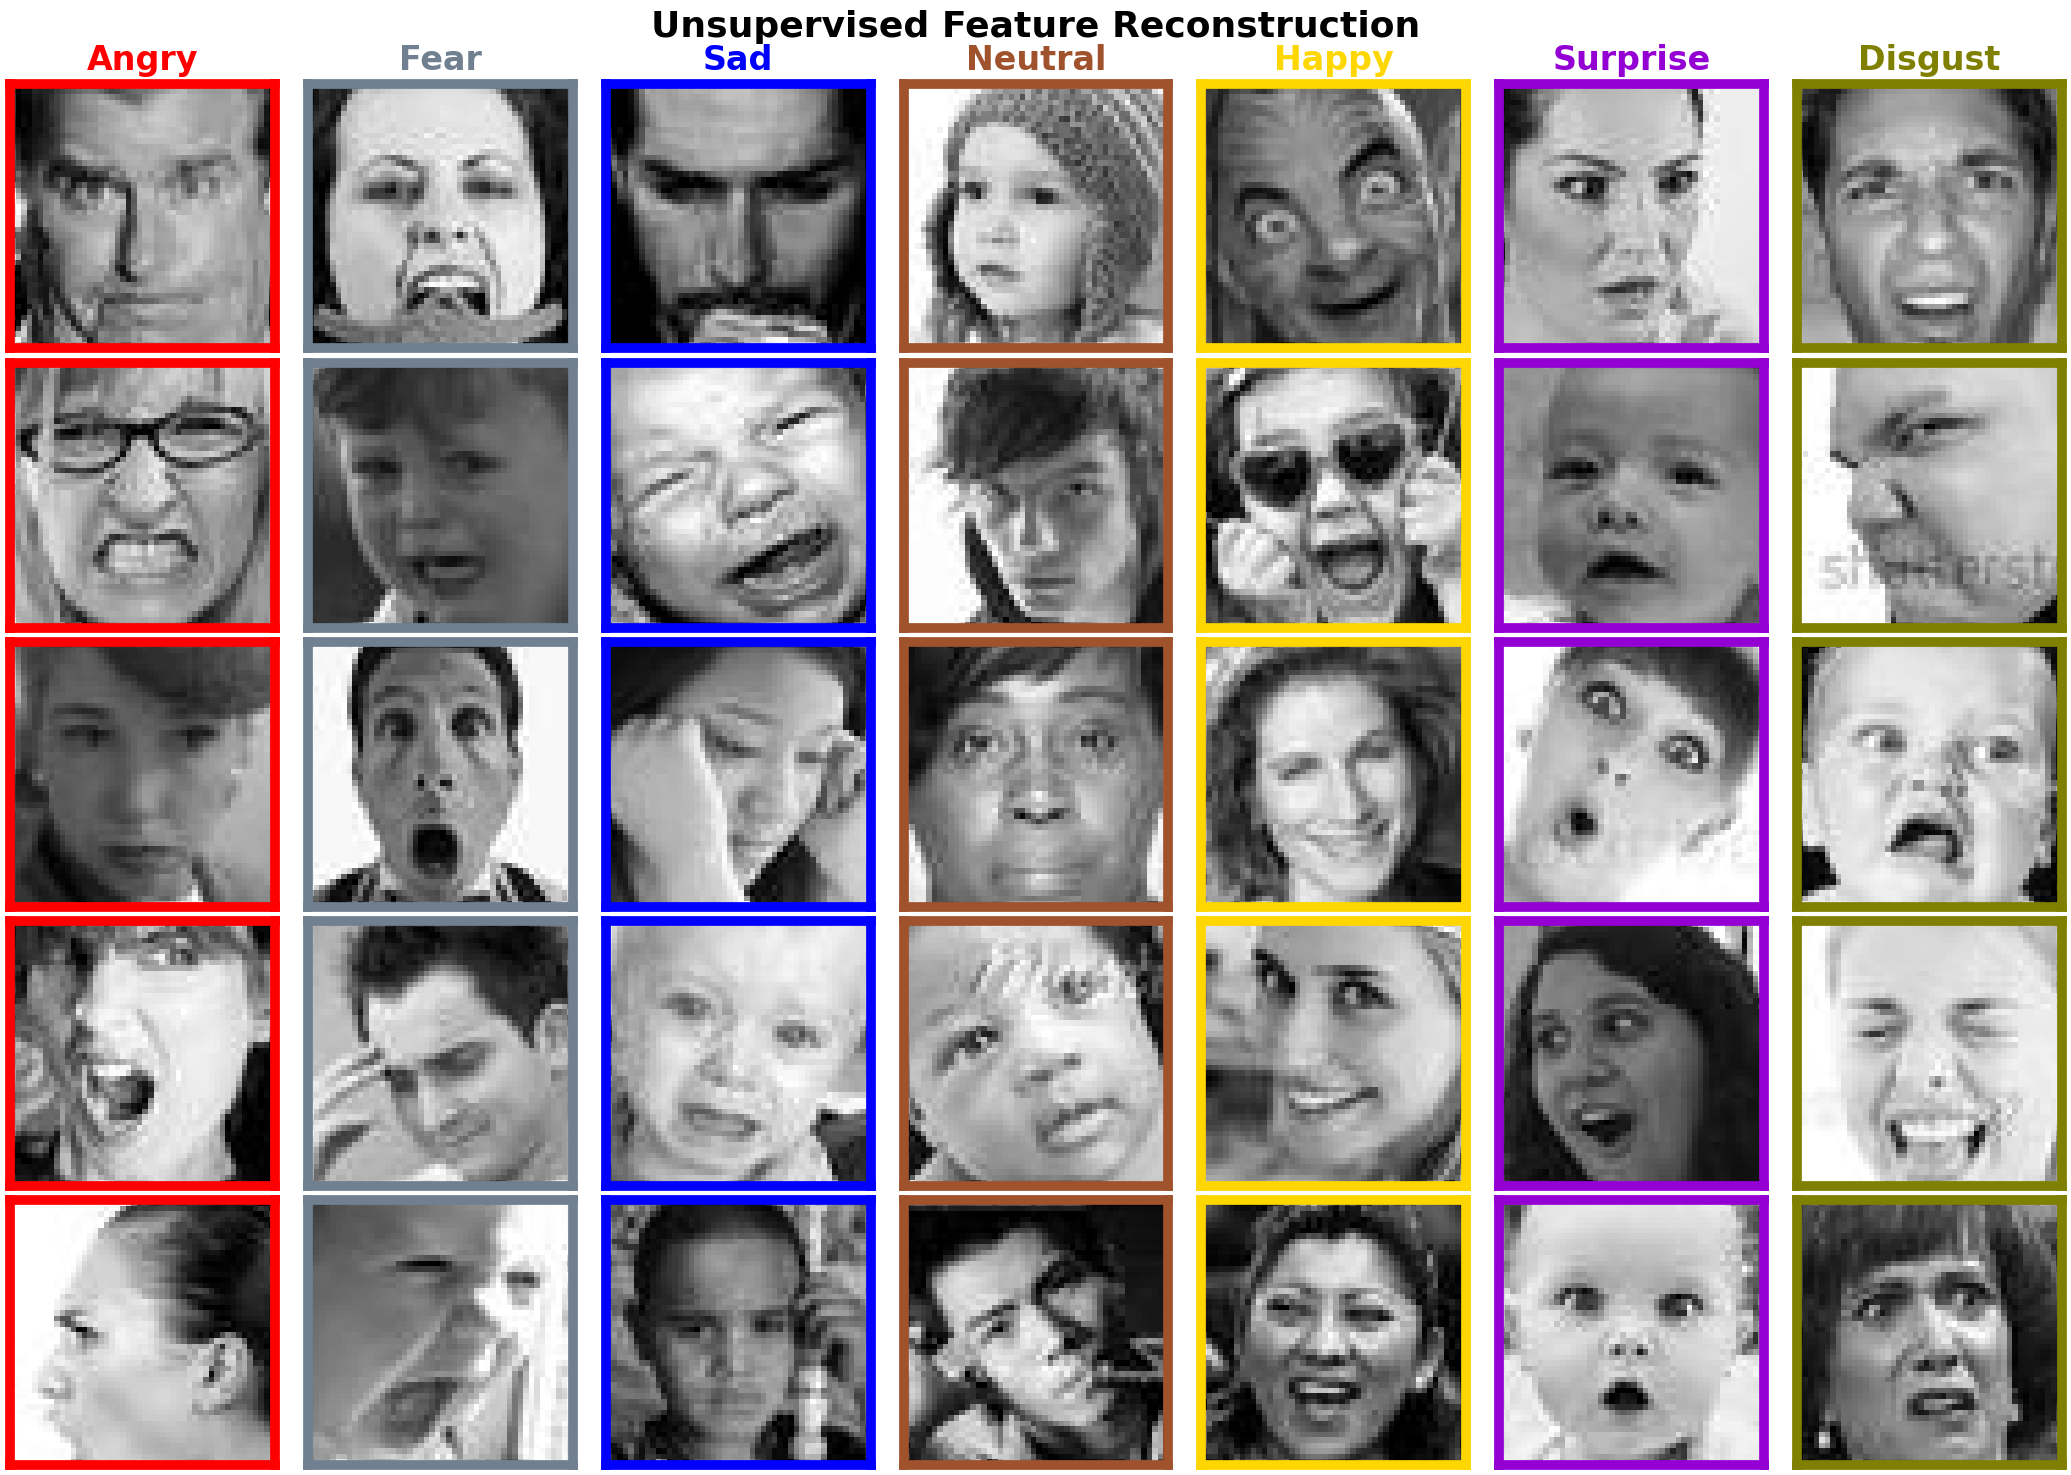

In [15]:
plot_face_matrix(
    image_dict=emo_samples, 
    row_labels=None, 
    group_colors=color_dict, 
    save_path=sample_imgs_save_path)

In [16]:
X_train, y_train = preprocess_images(fer2013, usage='Training')

In [17]:
pixel_imgs_save_path = os.path.join('imgs', 'comparisons', 'pixel_intensities.png')

Plot saved to imgs/comparisons/pixel_intensities.png


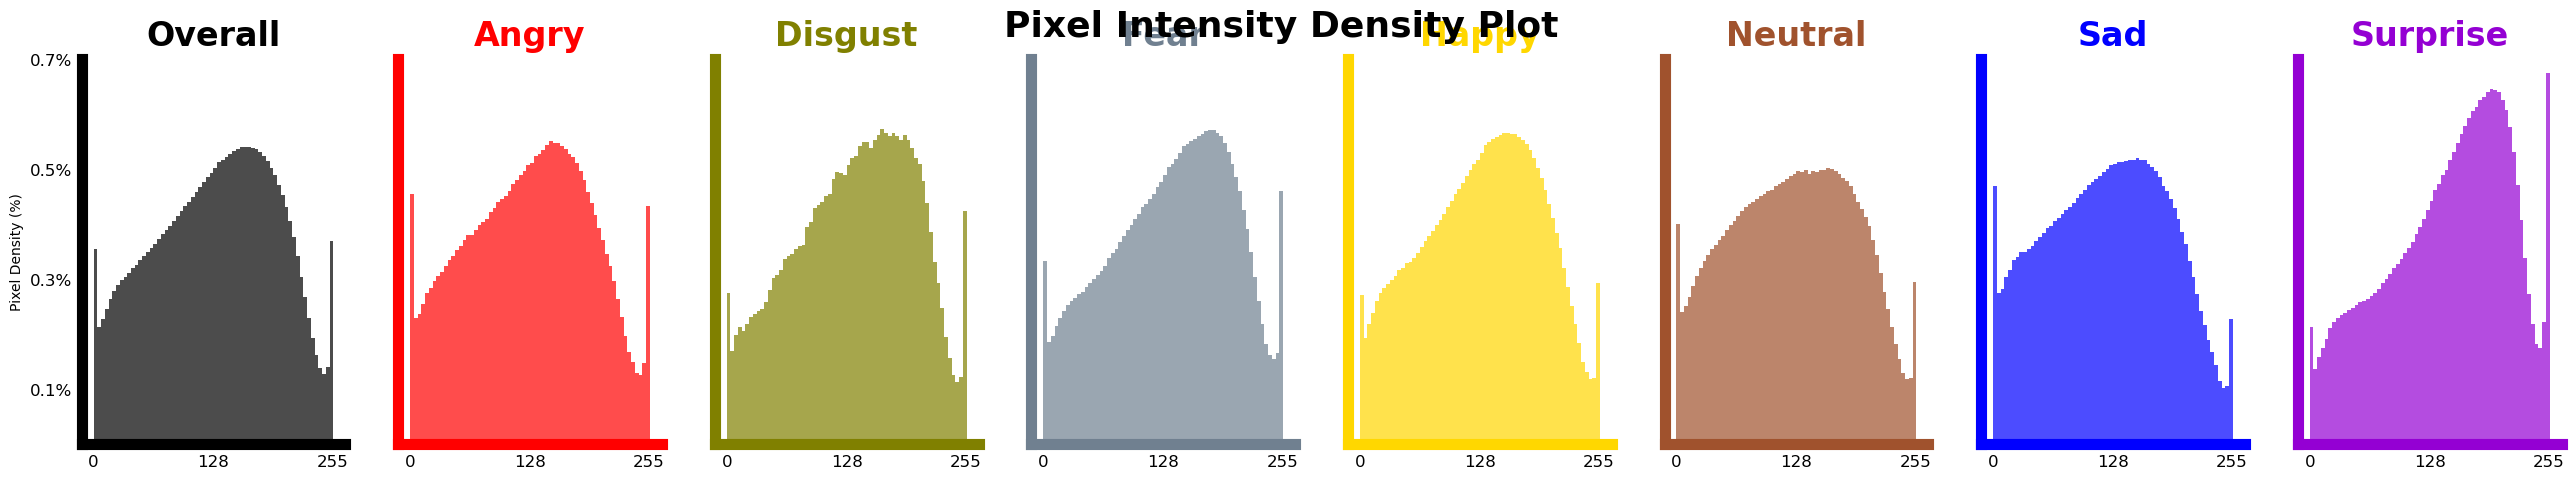

In [18]:
generate_pixel_intensities(X_train, y_train, color_dict=color_dict, save_path=pixel_imgs_save_path)

In [19]:
composite_face_dict, row_labels = generate_composite_faces(X_train, y_train, overall=True)

In [20]:
composite_imgs_save_path = os.path.join('imgs', 'comparisons', 'composite_faces.png')

Plot saved to imgs/comparisons/composite_faces.png


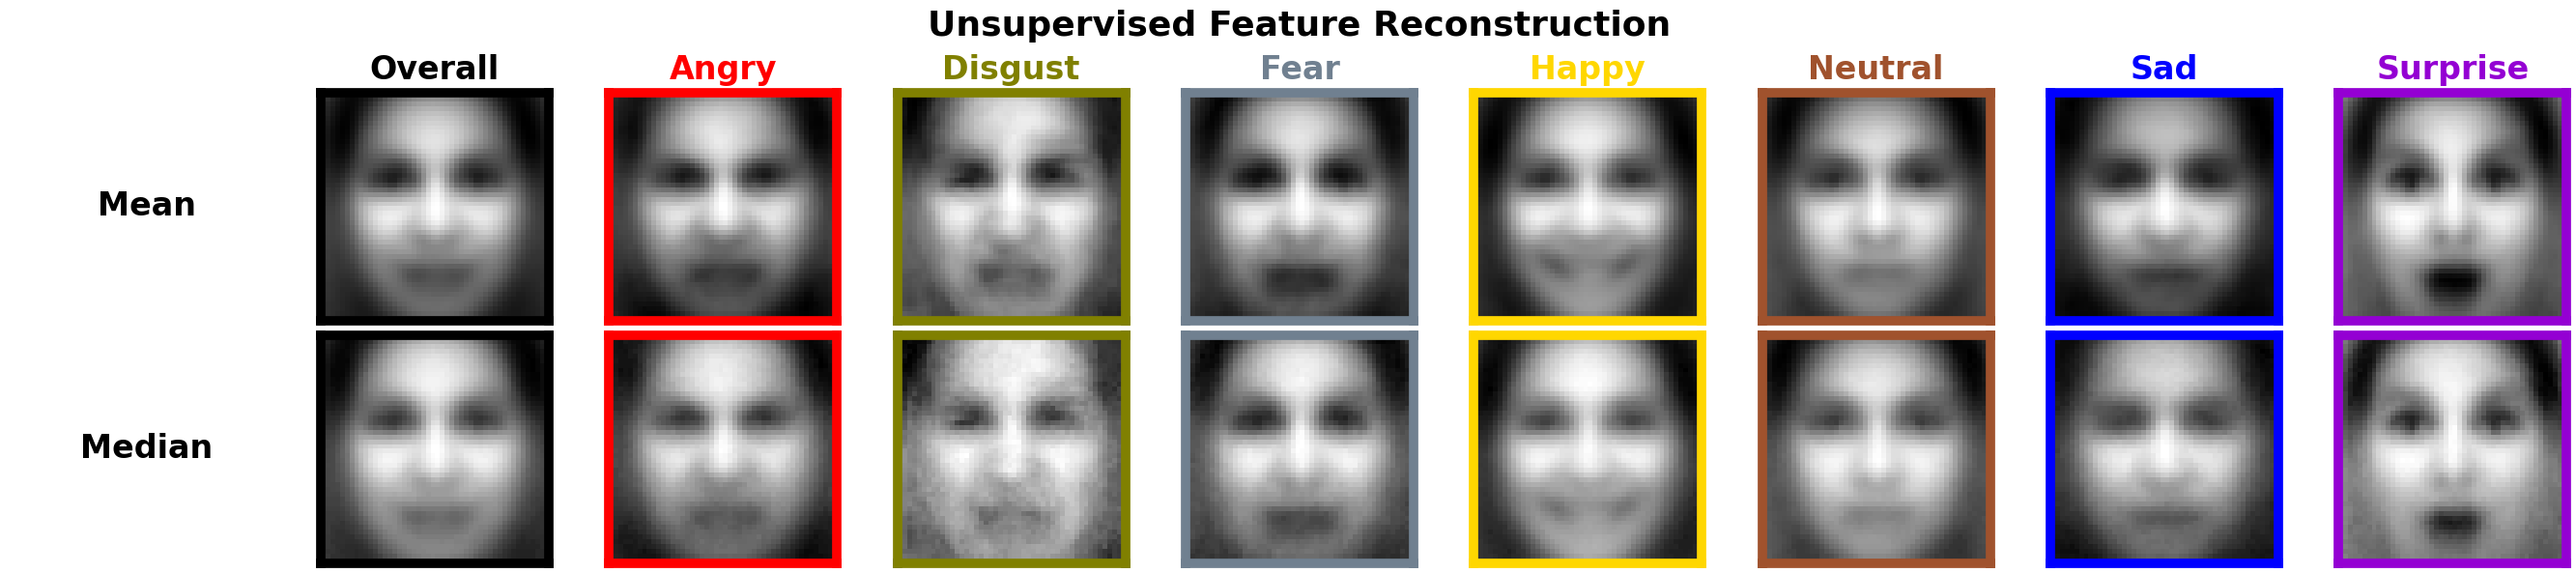

In [21]:
plot_face_matrix(
    image_dict=composite_face_dict, 
    row_labels=row_labels, 
    group_colors=color_dict, 
    save_path=composite_imgs_save_path)

## Feature Extraction via Dimensionality Reducement

#### Feature Extraction Analyses

In [24]:
decomp_models = load_json('./configs/unsupervised_models.json')

In [25]:
decomp_models

{'FastICA': {'module': 'sklearn.decomposition',
  'class': 'FastICA',
  'params': {'n_components': 30,
   'max_iter': 500,
   'tol': 0.0001,
   'random_state': 42}},
 'NMF': {'module': 'sklearn.decomposition',
  'class': 'NMF',
  'params': {'n_components': 50,
   'init': 'nndsvda',
   'max_iter': 500,
   'tol': 0.0001,
   'random_state': 42}},
 'PCA': {'module': 'sklearn.decomposition',
  'class': 'PCA',
  'params': {'n_components': 100,
   'whiten': True,
   'svd_solver': 'auto',
   'random_state': 42}}}

In [26]:
decomp_models.keys()

dict_keys(['FastICA', 'NMF', 'PCA'])

In [27]:
model_keys = ['PCA', 'NMF', 'FastICA']
norm_options = ['minmax', 'minmax', 'minmax']
components_list = [[1, 10, 25, 50, 75, 100], [1, 10, 20, 30, 50], [1, 5, 10, 20, 30]]

# comps: 1
reduced shape: (28709, 1)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 1
Length of reconstructed images is: 1
# comps: 10
reduced shape: (28709, 10)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 10
Length of reconstructed images is: 2
# comps: 25
reduced shape: (28709, 25)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 25
Length of reconstructed images is: 3
# comps: 50
reduced shape: (28709, 50)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 50
Length of reconstructed images is: 4
# comps: 75
reduced shape: (28709, 75)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 75
Length of reconstructed images is: 5
# comps: 100
reduced shape: (28709, 100)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 100
Length of reconstructed images is: 6
# comps: 1
reduced shape: (3995, 1)
reconstructed shape: (3995, 2304)
end iteration for: Angry, 1
Length of reconstructed images is: 1
# comps: 10
r

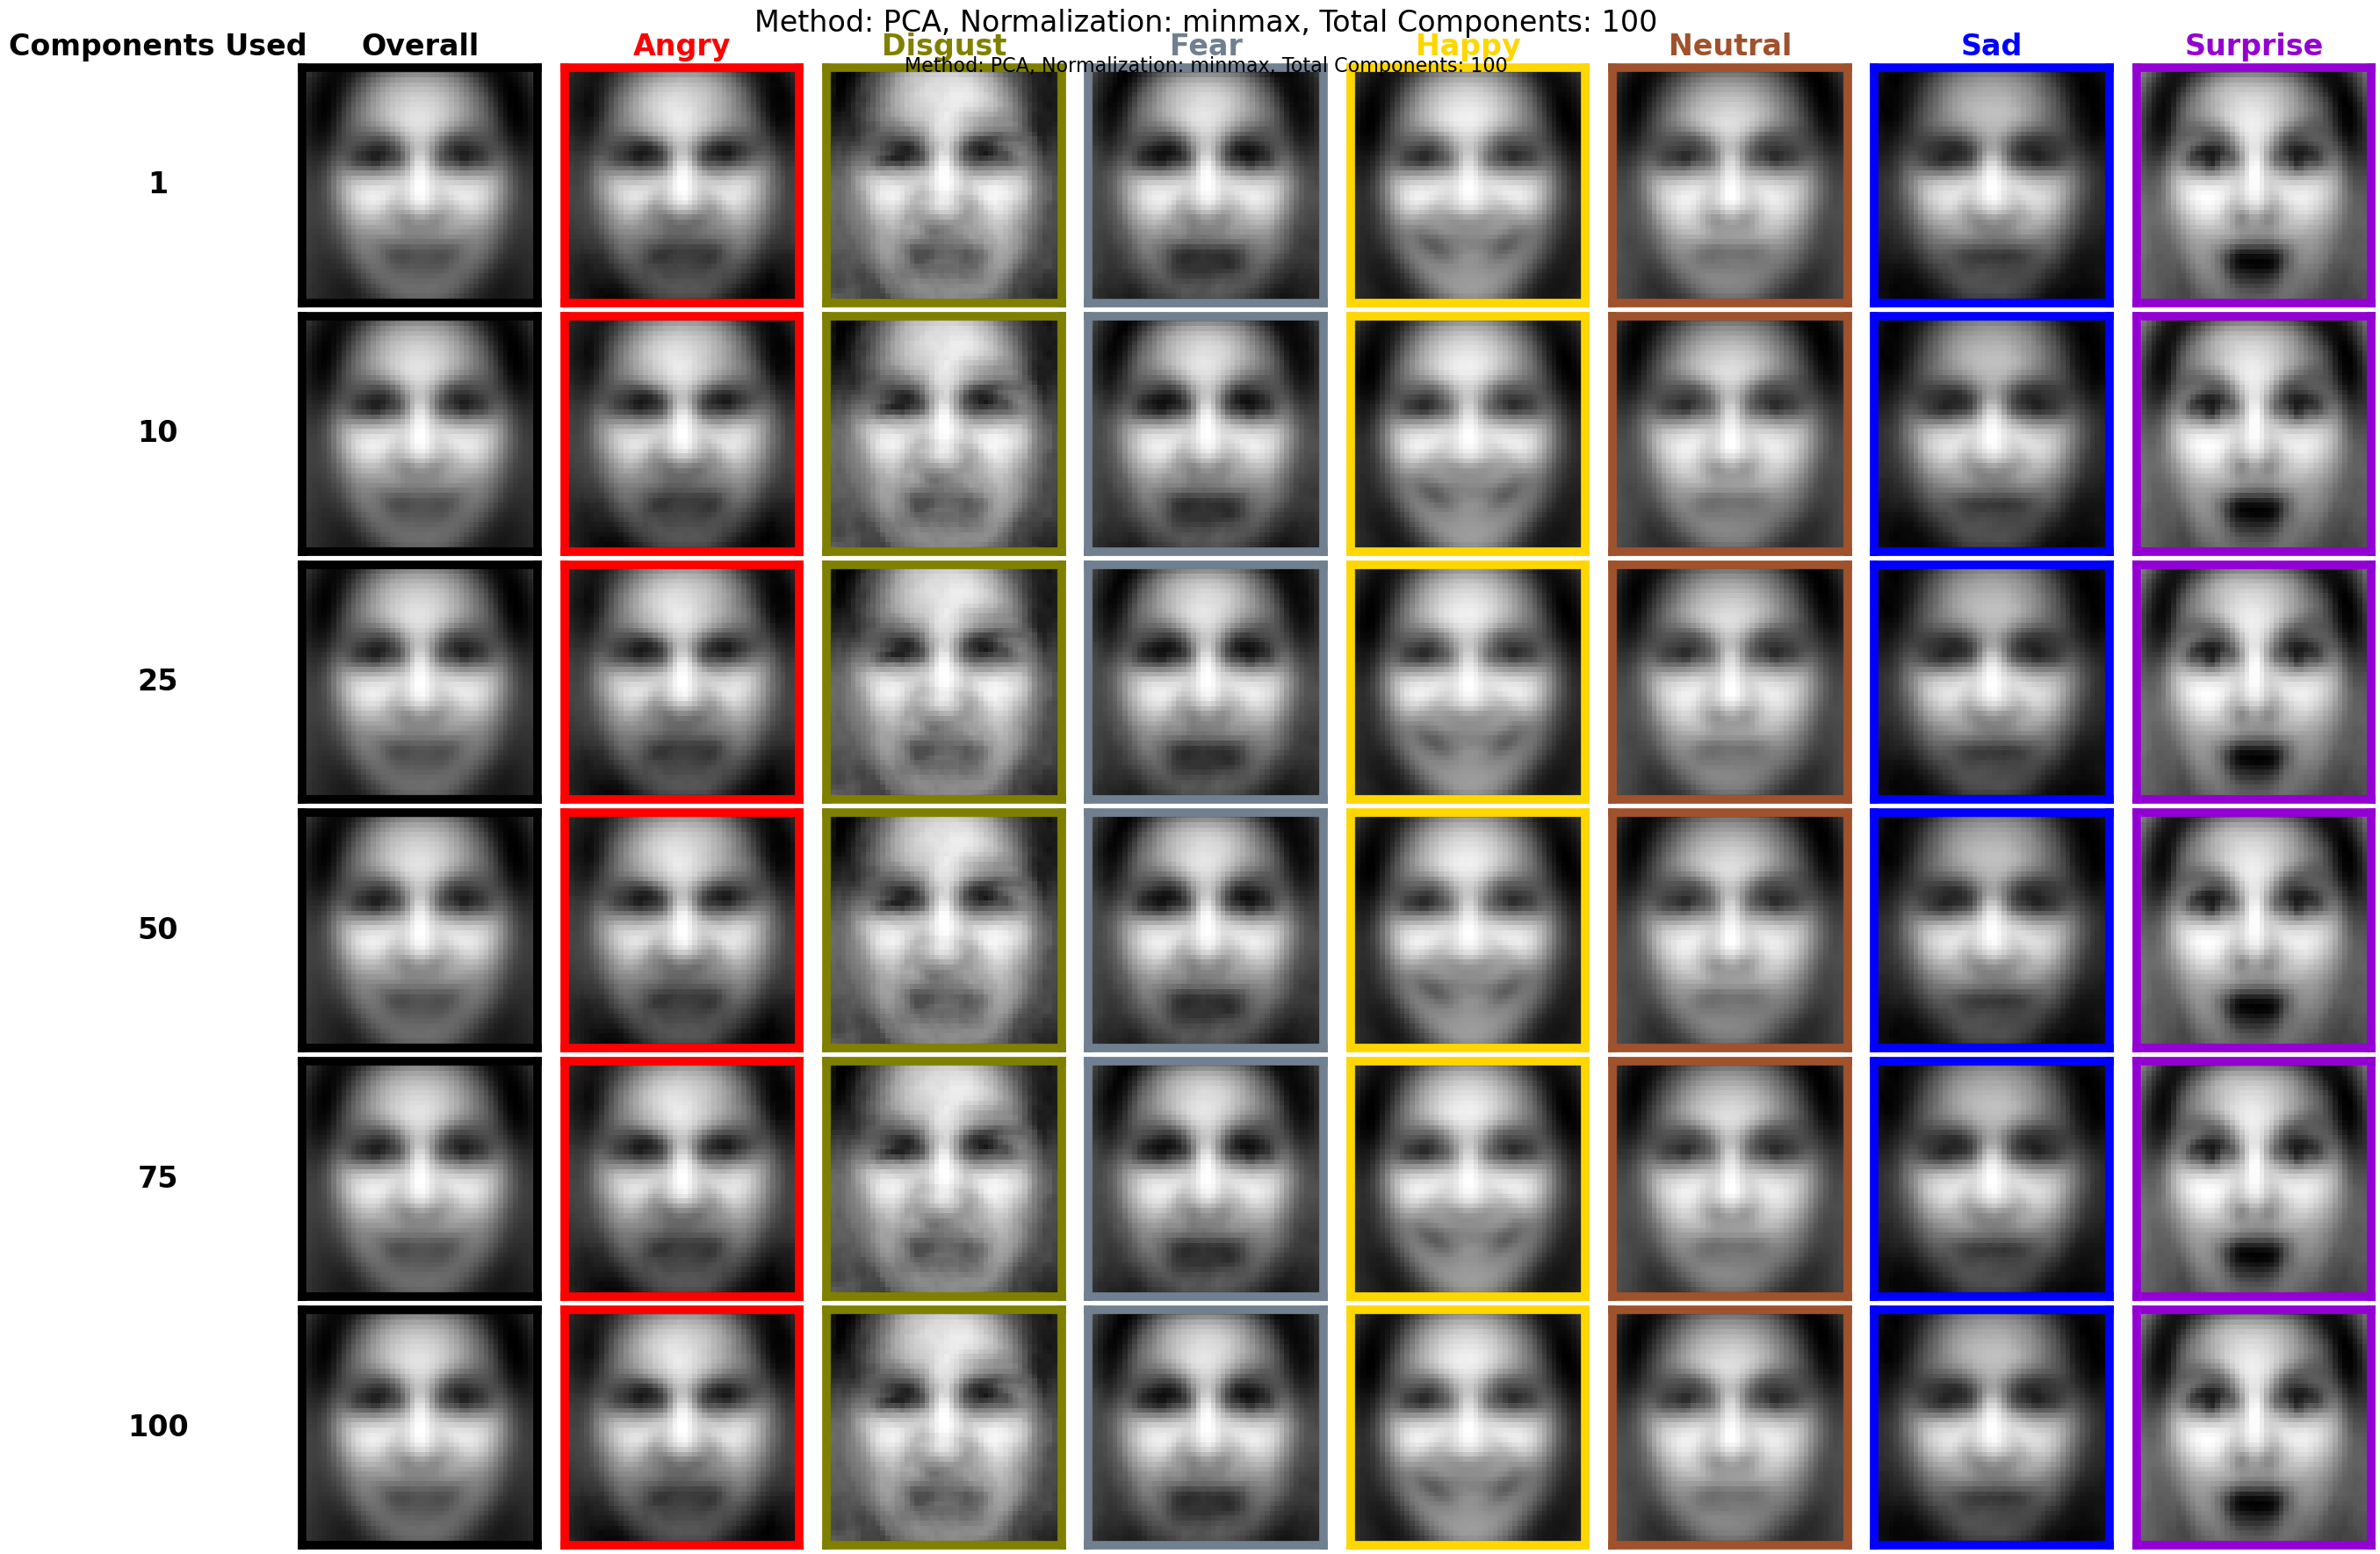

Completed: method=PCA, normalization=minmax, components_list=[1, 10, 25, 50, 75, 100], max_components=100
# comps: 1
reduced shape: (28709, 1)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 1
Length of reconstructed images is: 1
# comps: 10
reduced shape: (28709, 10)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 10
Length of reconstructed images is: 2
# comps: 20
reduced shape: (28709, 20)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 20
Length of reconstructed images is: 3
# comps: 30
reduced shape: (28709, 30)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 30
Length of reconstructed images is: 4
# comps: 50
reduced shape: (28709, 50)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 50
Length of reconstructed images is: 5
# comps: 1
reduced shape: (3995, 1)
reconstructed shape: (3995, 2304)
end iteration for: Angry, 1
Length of reconstructed images is: 1
# comps: 10
reduced shape: (3995, 10)
reconstructed 

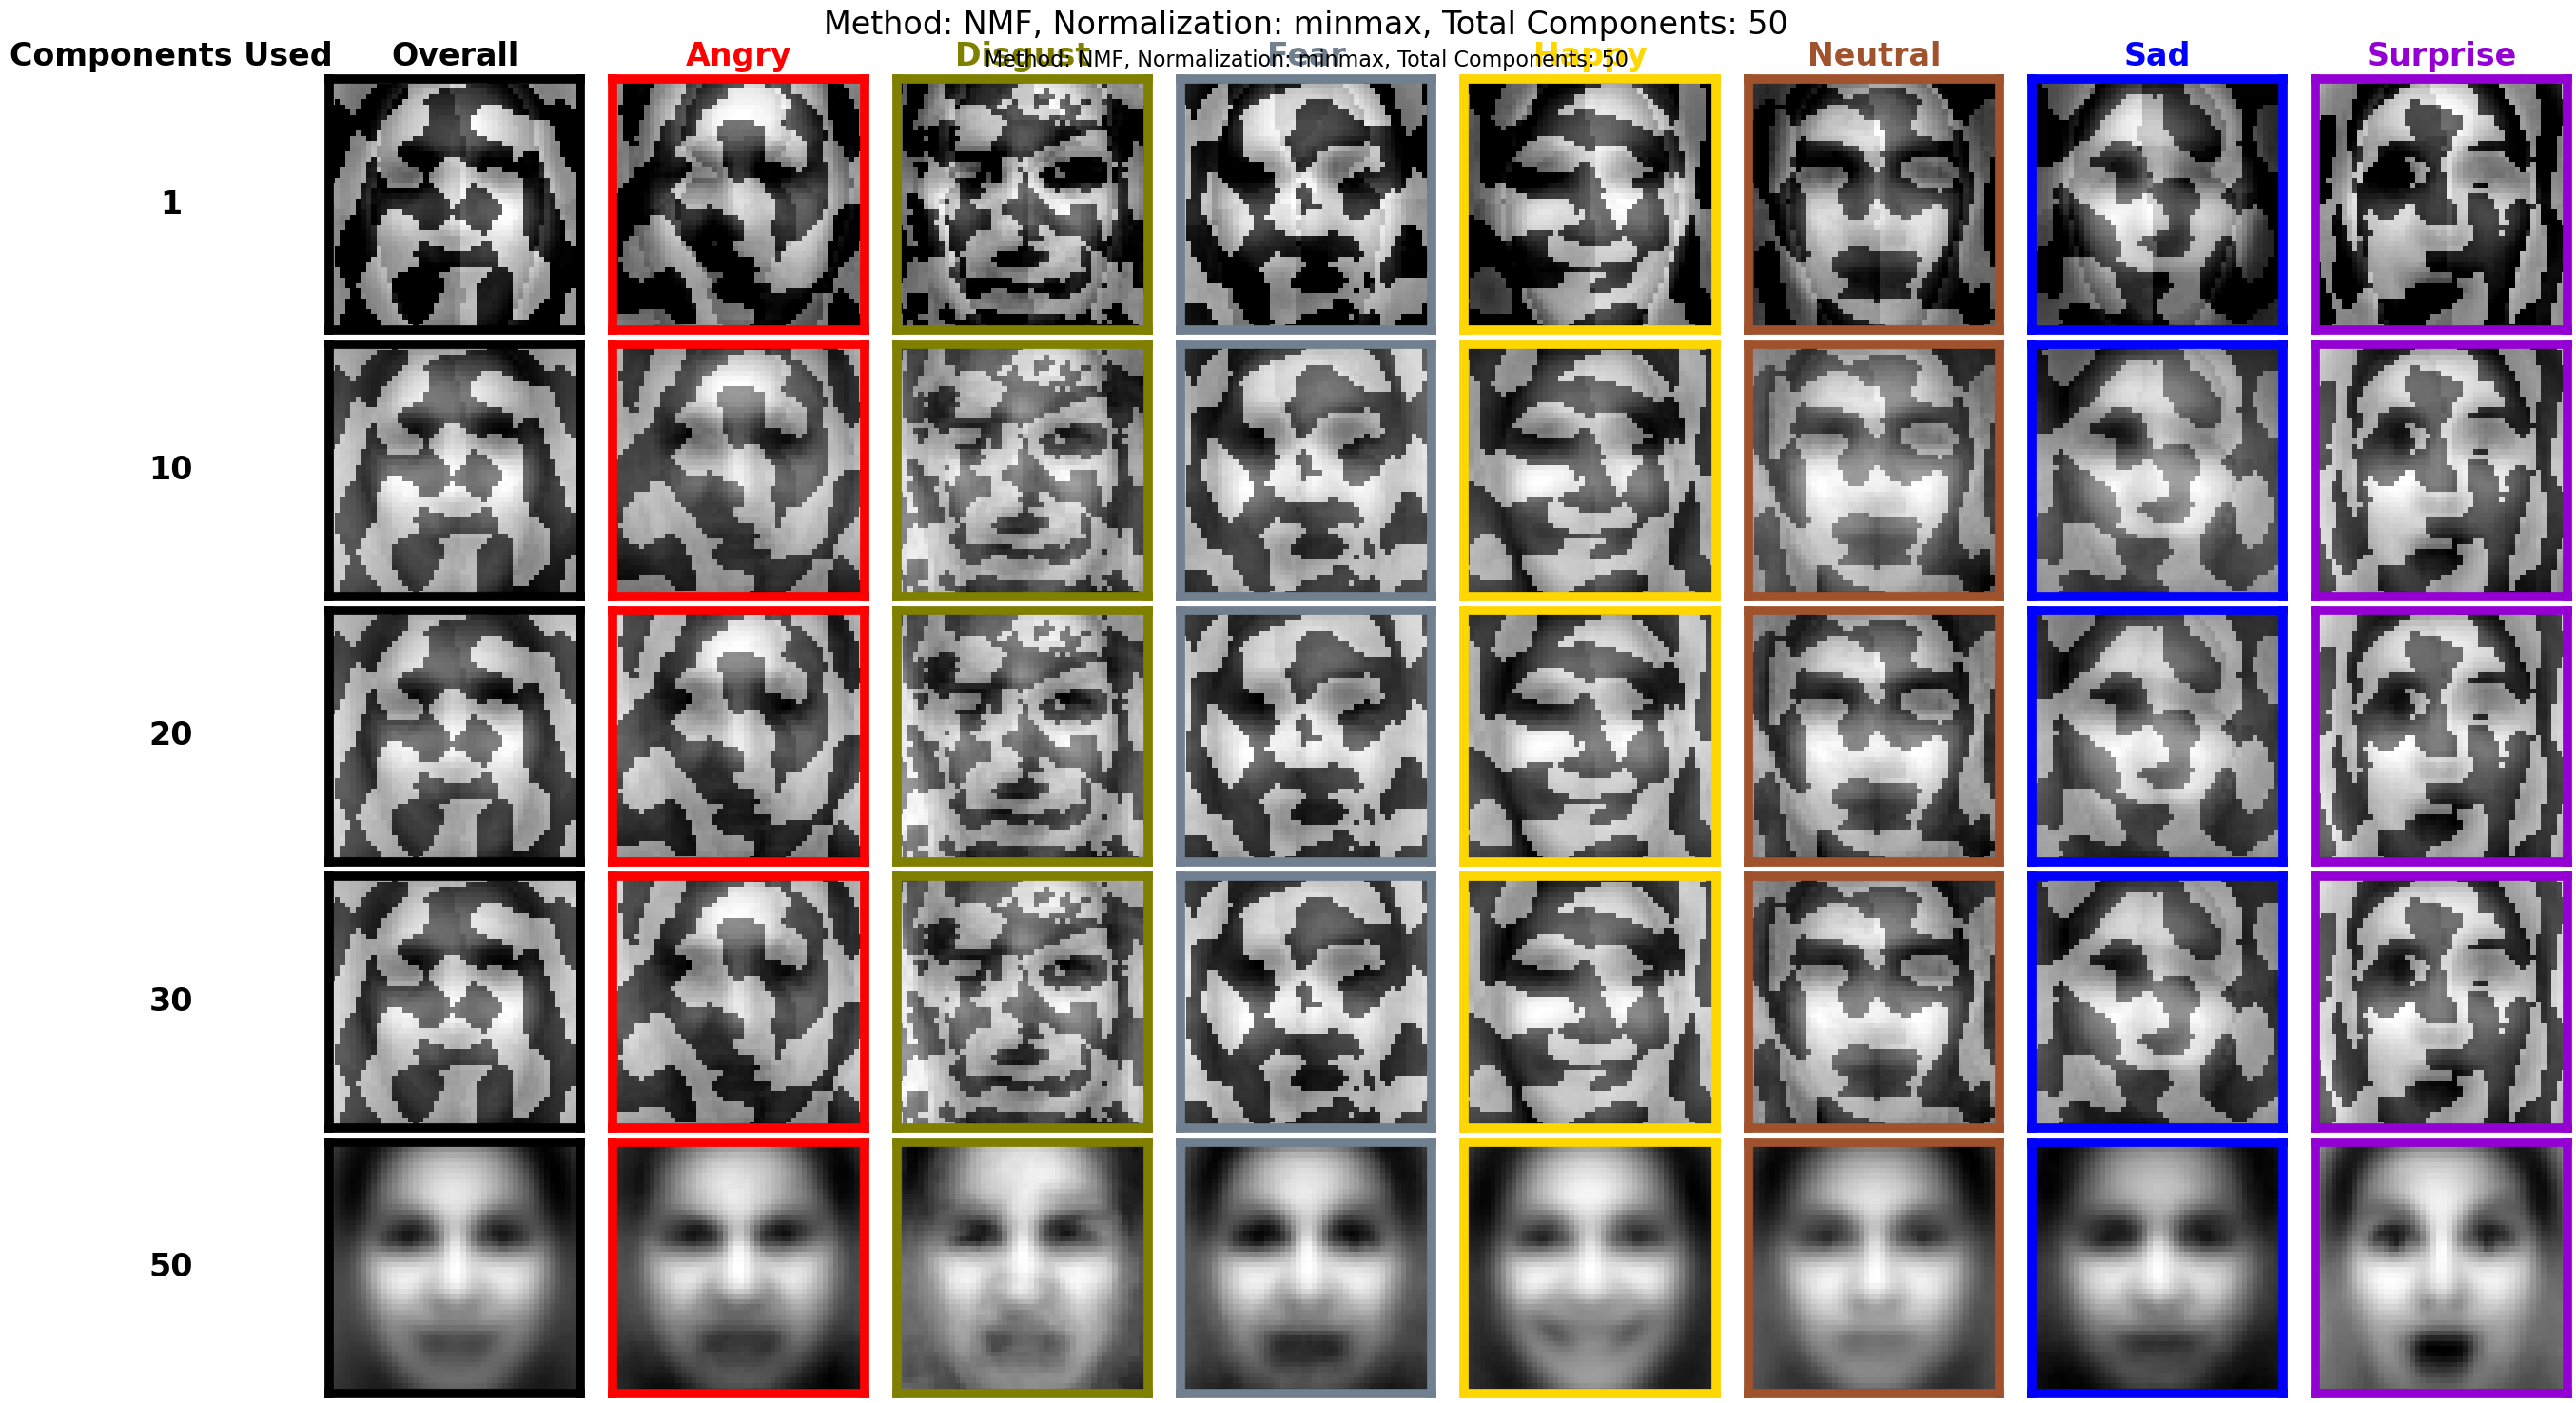

Completed: method=NMF, normalization=minmax, components_list=[1, 10, 20, 30, 50], max_components=50


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


# comps: 1
reduced shape: (28709, 1)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 1
Length of reconstructed images is: 1
# comps: 5
reduced shape: (28709, 5)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 5
Length of reconstructed images is: 2
# comps: 10
reduced shape: (28709, 10)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 10
Length of reconstructed images is: 3
# comps: 20
reduced shape: (28709, 20)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 20
Length of reconstructed images is: 4
# comps: 30
reduced shape: (28709, 30)
reconstructed shape: (28709, 2304)
end iteration for: Overall, 30
Length of reconstructed images is: 5


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


# comps: 1
reduced shape: (3995, 1)
reconstructed shape: (3995, 2304)
end iteration for: Angry, 1
Length of reconstructed images is: 1
# comps: 5
reduced shape: (3995, 5)
reconstructed shape: (3995, 2304)
end iteration for: Angry, 5
Length of reconstructed images is: 2
# comps: 10
reduced shape: (3995, 10)
reconstructed shape: (3995, 2304)
end iteration for: Angry, 10
Length of reconstructed images is: 3
# comps: 20
reduced shape: (3995, 20)
reconstructed shape: (3995, 2304)
end iteration for: Angry, 20
Length of reconstructed images is: 4
# comps: 30
reduced shape: (3995, 30)
reconstructed shape: (3995, 2304)
end iteration for: Angry, 30
Length of reconstructed images is: 5


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


# comps: 1
reduced shape: (436, 1)
reconstructed shape: (436, 2304)
end iteration for: Disgust, 1
Length of reconstructed images is: 1
# comps: 5
reduced shape: (436, 5)
reconstructed shape: (436, 2304)
end iteration for: Disgust, 5
Length of reconstructed images is: 2
# comps: 10
reduced shape: (436, 10)
reconstructed shape: (436, 2304)
end iteration for: Disgust, 10
Length of reconstructed images is: 3
# comps: 20
reduced shape: (436, 20)
reconstructed shape: (436, 2304)
end iteration for: Disgust, 20
Length of reconstructed images is: 4
# comps: 30
reduced shape: (436, 30)
reconstructed shape: (436, 2304)
end iteration for: Disgust, 30
Length of reconstructed images is: 5
# comps: 1
reduced shape: (4097, 1)
reconstructed shape: (4097, 2304)
end iteration for: Fear, 1
Length of reconstructed images is: 1
# comps: 5
reduced shape: (4097, 5)
reconstructed shape: (4097, 2304)
end iteration for: Fear, 5
Length of reconstructed images is: 2
# comps: 10
reduced shape: (4097, 10)
reconstruc

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


# comps: 1
reduced shape: (7215, 1)
reconstructed shape: (7215, 2304)
end iteration for: Happy, 1
Length of reconstructed images is: 1
# comps: 5
reduced shape: (7215, 5)
reconstructed shape: (7215, 2304)
end iteration for: Happy, 5
Length of reconstructed images is: 2
# comps: 10
reduced shape: (7215, 10)
reconstructed shape: (7215, 2304)
end iteration for: Happy, 10
Length of reconstructed images is: 3
# comps: 20
reduced shape: (7215, 20)
reconstructed shape: (7215, 2304)
end iteration for: Happy, 20
Length of reconstructed images is: 4
# comps: 30
reduced shape: (7215, 30)
reconstructed shape: (7215, 2304)
end iteration for: Happy, 30
Length of reconstructed images is: 5


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


# comps: 1
reduced shape: (4965, 1)
reconstructed shape: (4965, 2304)
end iteration for: Neutral, 1
Length of reconstructed images is: 1
# comps: 5
reduced shape: (4965, 5)
reconstructed shape: (4965, 2304)
end iteration for: Neutral, 5
Length of reconstructed images is: 2
# comps: 10
reduced shape: (4965, 10)
reconstructed shape: (4965, 2304)
end iteration for: Neutral, 10
Length of reconstructed images is: 3
# comps: 20
reduced shape: (4965, 20)
reconstructed shape: (4965, 2304)
end iteration for: Neutral, 20
Length of reconstructed images is: 4
# comps: 30
reduced shape: (4965, 30)
reconstructed shape: (4965, 2304)
end iteration for: Neutral, 30
Length of reconstructed images is: 5


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


# comps: 1
reduced shape: (4830, 1)
reconstructed shape: (4830, 2304)
end iteration for: Sad, 1
Length of reconstructed images is: 1
# comps: 5
reduced shape: (4830, 5)
reconstructed shape: (4830, 2304)
end iteration for: Sad, 5
Length of reconstructed images is: 2
# comps: 10
reduced shape: (4830, 10)
reconstructed shape: (4830, 2304)
end iteration for: Sad, 10
Length of reconstructed images is: 3
# comps: 20
reduced shape: (4830, 20)
reconstructed shape: (4830, 2304)
end iteration for: Sad, 20
Length of reconstructed images is: 4
# comps: 30
reduced shape: (4830, 30)
reconstructed shape: (4830, 2304)
end iteration for: Sad, 30
Length of reconstructed images is: 5


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


# comps: 1
reduced shape: (3171, 1)
reconstructed shape: (3171, 2304)
end iteration for: Surprise, 1
Length of reconstructed images is: 1
# comps: 5
reduced shape: (3171, 5)
reconstructed shape: (3171, 2304)
end iteration for: Surprise, 5
Length of reconstructed images is: 2
# comps: 10
reduced shape: (3171, 10)
reconstructed shape: (3171, 2304)
end iteration for: Surprise, 10
Length of reconstructed images is: 3
# comps: 20
reduced shape: (3171, 20)
reconstructed shape: (3171, 2304)
end iteration for: Surprise, 20
Length of reconstructed images is: 4
# comps: 30
reduced shape: (3171, 30)
reconstructed shape: (3171, 2304)
end iteration for: Surprise, 30
Length of reconstructed images is: 5
Plot saved to imgs/comparisons/FastICA_minmax_max_comp_30_faces.png


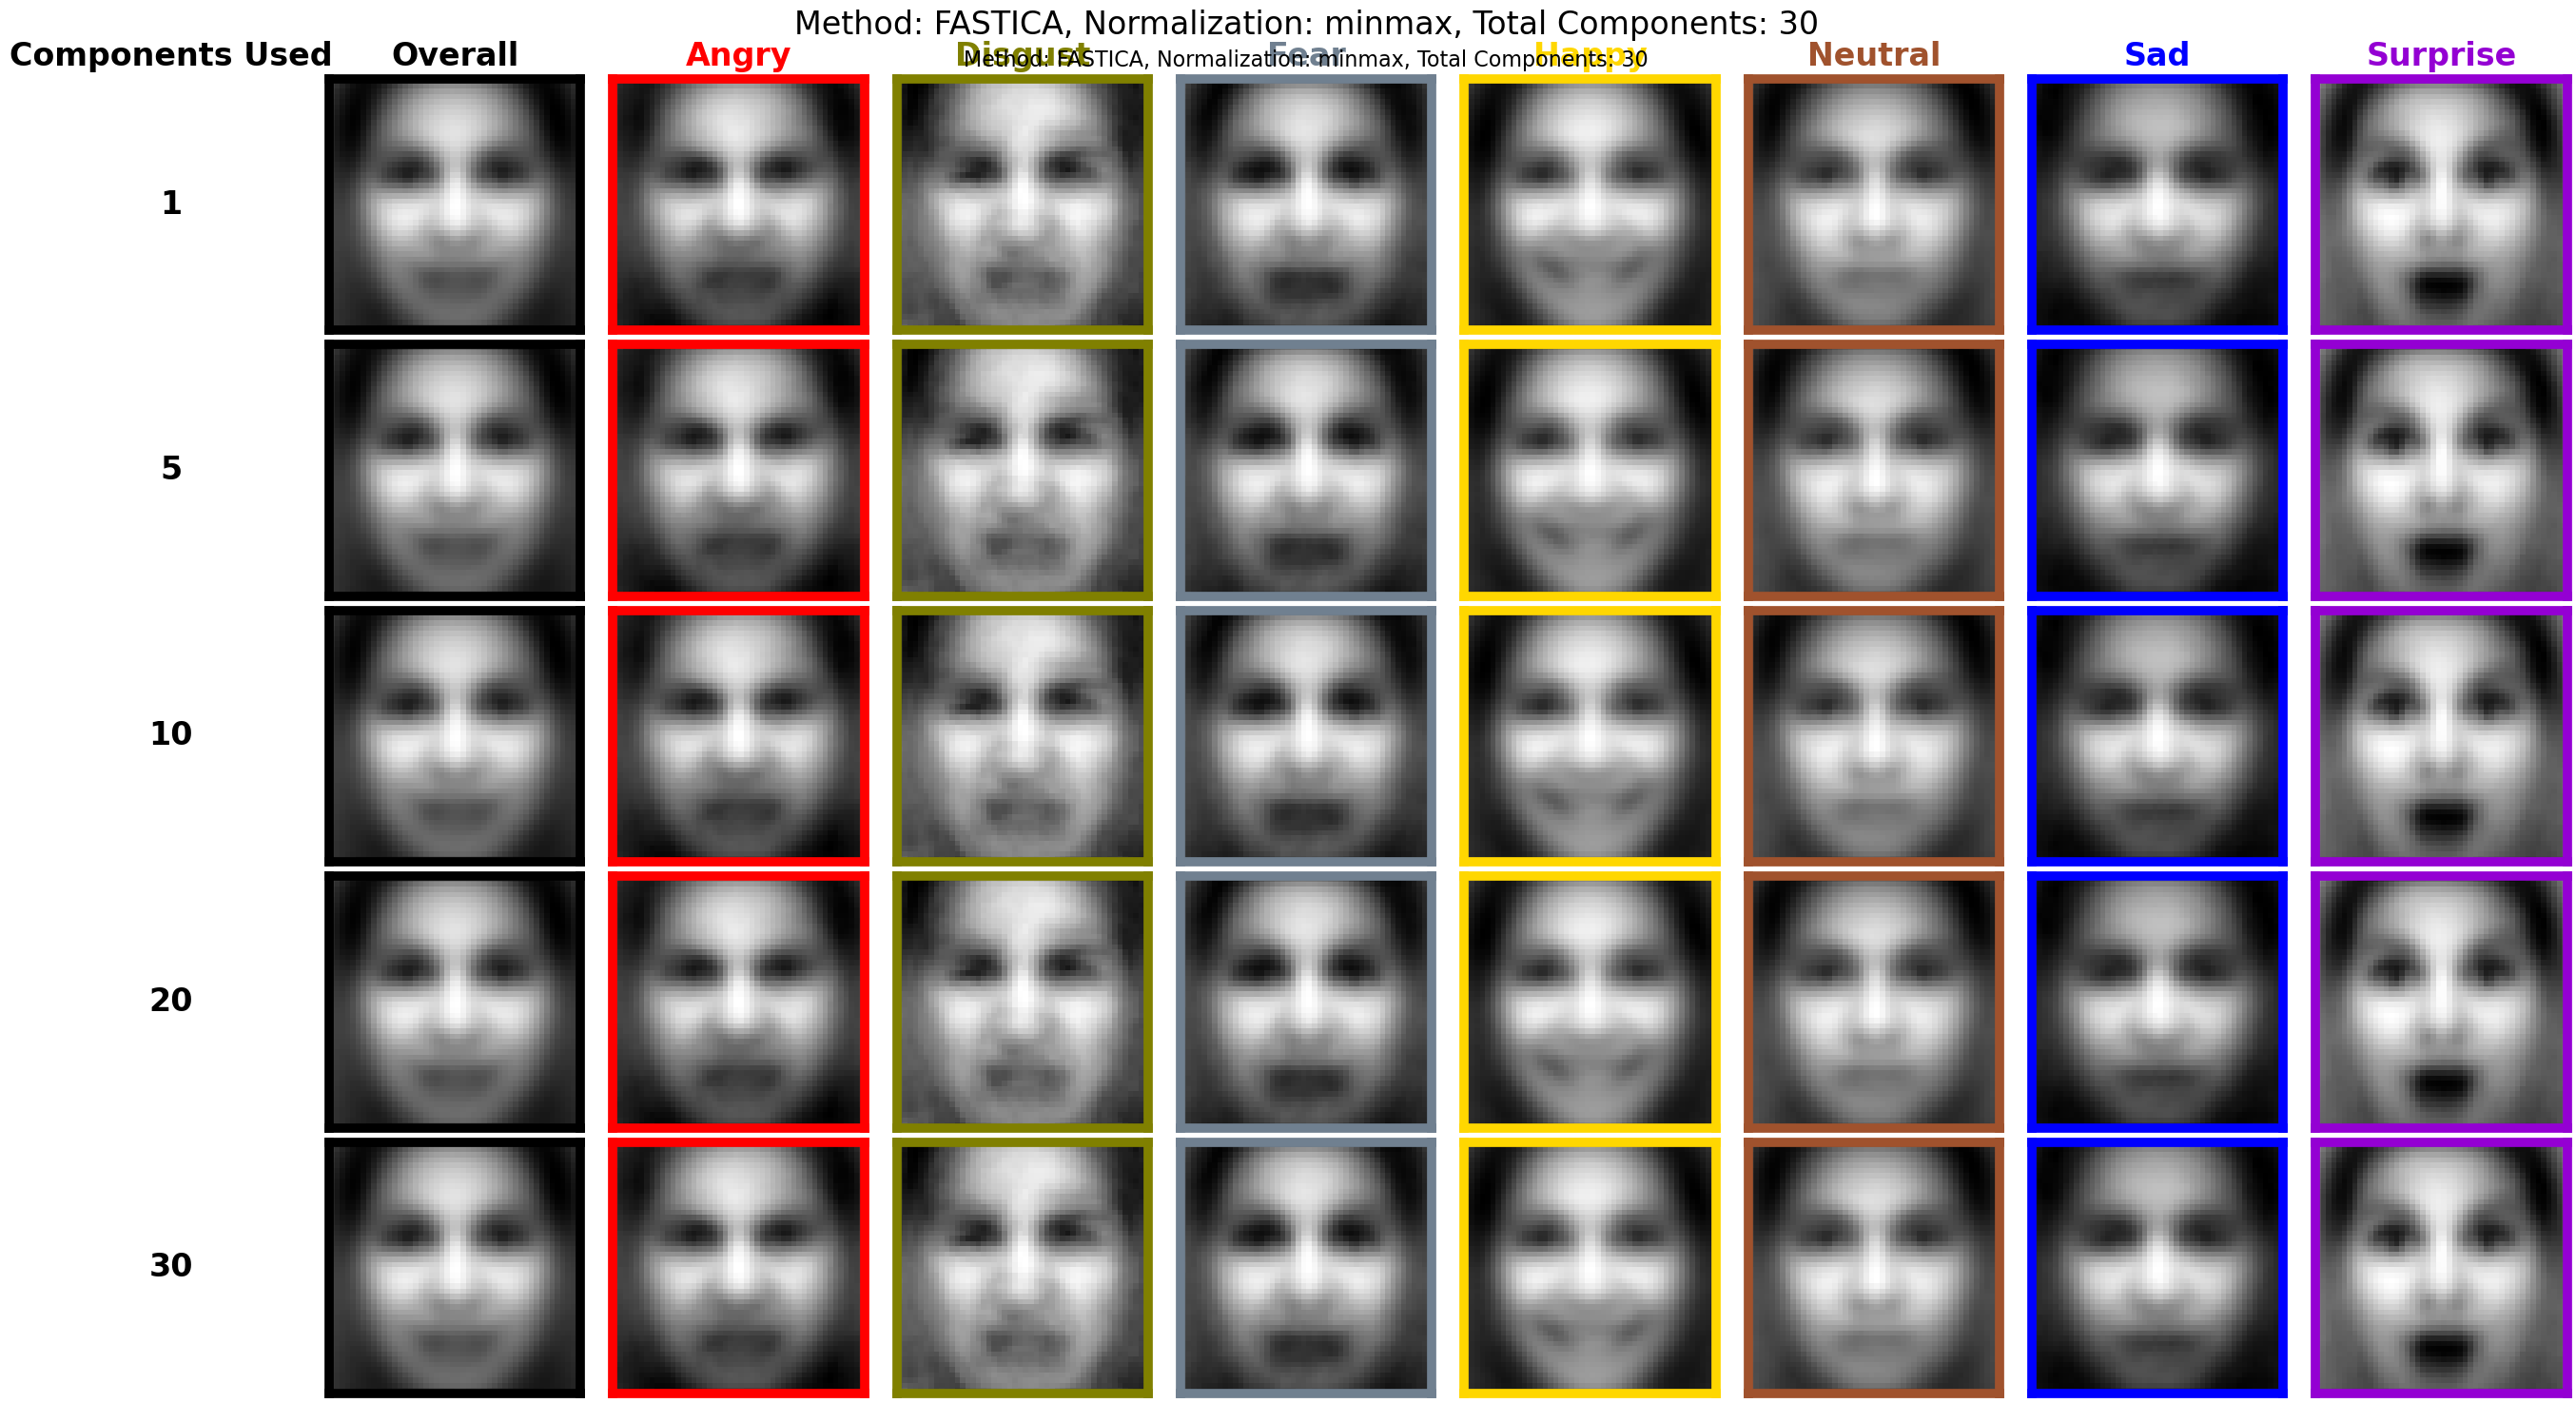

Completed: method=FastICA, normalization=minmax, components_list=[1, 5, 10, 20, 30], max_components=30


In [28]:
for decomp_model, norm, comps_list in zip(model_keys, norm_options, components_list):
    max_comp = decomp_models[decomp_model]['params']['n_components']
    results, used_components = run_dimensionality_reduction(
        X=X_train, 
        y=y_train, 
        components_list=comps_list, 
        model_dict=decomp_models[decomp_model], 
        normalize='none'
    )

    dim_reduce_save_path = os.path.join('imgs', 'comparisons', f'{decomp_model}_{norm}_max_comp_{max_comp}_faces.png')
    
    # Generate a matrix plot of the results
    plot_face_matrix(
            results, 
            row_labels=used_components, 
            group_colors=color_dict,
            save_path=dim_reduce_save_path,
            method=decomp_model,
            norm=norm,
            total_components=max_comp)    
    print(f"Completed: method={decomp_model}, normalization={norm}, components_list={comps_list}, max_components={max_comp}")

In [29]:
type(results['Sad'])

list

In [30]:
arrays = results['Sad']

In [31]:
are_identical = all(np.allclose(arr, arrays[0]) for arr in arrays[1:])
are_identical

NameError: name 'np' is not defined

In [ ]:
import numpy as np

In [ ]:
# # Iterate over all combinations
# for method, norm, max_comp, comps_list in zip(methods, norm_options, max_componenets_list, components_list):
#     results, used_components, total_components = run_dimensionality_reduction(
#         X=X_train, 
#         y=y_train, 
#         max_components=max_comp, 
#         components_list=comps_list, 
#         method=method, 
#         normalize=norm
#     )
#     dim_reduce_save_path = os.path.join('imgs', 'comparisons', f'{method}_{norm}_max_comp_{max_comp}_faces.png')
    
#     # Generate a matrix plot of the results
#     plot_face_matrix(
#             results, 
#             row_labels=used_components, 
#             group_colors=color_dict,
#             save_path=dim_reduce_save_path,
#             method=method,
#             norm=norm,
#             total_components=total_components)    
#     print(f"Completed: method={method}, normalization={norm}, components_list={comps_list}, max_components={max_comp}")

## Examples for Running Additional Iterations
#### Once cell with analysis lists should be used
#### Then run iteravtive cell below
#### NOTE: Analyses can be time consuming.
#### NOTE: Not all combinations are meaningful.

#### Single Analysis Example

In [ ]:
# # Define the test parameters
# method = 'nmf'  # Using NMF as the first method to test
# normalize = 'none'  # Skipping normalization
# components_list = [5, 10]  # Start with a small number of components
# max_components = 20  # Set a reasonable upper limit for components

In [ ]:
# # Run the dimensionality reduction function with the test parameters
# results, used_components, total_components = run_dimensionality_reduction(
#     X_train, y_train, max_components, components_list, method=method, normalize=normalize
# )

In [ ]:
# test_dim_reduce = os.path.join('imgs', 'comparisons', 'nmf_none_faces.png')

In [ ]:
# plot_face_matrix(
#         results, 
#         row_labels=used_components, 
#         group_colors=color_dict, 
#         save_path=test_dim_reduce,
#         total_components=total_components)

#### Multiple Analysis Pipeline

In [ ]:
# # Define parameter grids
# methods = ['pca', 'nmf', 'fa', 'ica']
# normalization_options = ['none', 'standard', 'minmax']
# max_components_list = [30, 50, 100]  # Use this list to iterate over different values
# components_lists = [[1, 5, 10, 20, 30], [1, 10, 20, 30, 50], [1, 10, 25, 50, 75, 100]]  # Match components to max_components

In [ ]:
# # Define parameter grids
# methods = ['fa']
# normalization_options = ['none', 'standard', 'minmax']
# max_components_list = [30, 50, 100]  # Use this list to iterate over different values
# components_lists = [[1, 5, 10, 20, 30], [1, 10, 20, 30, 50], [1, 10, 25, 50, 75, 100]]  # Match components to max_components

In [ ]:
# # Iterate over all combinations
# for method, norm, (components_list, max_components) in itertools.product(
#         methods, normalization_options, zip(components_lists, max_components_list)):
#         if norm == 'standard' and method == 'nmf':
#             pass
#                 # Run the dimensionality reduction analysis
#         else:
#             try:
#                 # Call the previously defined function
#                 results, used_components, total_components = run_dimensionality_reduction(
#                     X_train, y_train, max_components, components_list, method=method, normalize=norm
#                 )
#                 dim_reduce_save_path = os.path.join('imgs', 'comparisons', f'{method}_{norm}_max_comp_{max_components}_faces.png')
    
#                 # Generate a matrix plot of the results
#                 plot_face_matrix(
#                         results, 
#                         row_labels=used_components, 
#                         group_colors=color_dict, 
#                         save_path=dim_reduce_save_path,
#                         total_components=total_components)    
#                 print(f"Completed: method={method}, normalization={norm}, components_list={components_list}, max_components={max_components}")
    
#             except Exception as e:
#                 print(f"Failed: method={method}, normalization={norm}, components_list={components_list}, max_components={max_components}")
#                 print(f"Error: {e}")